In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# ignore warnings
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

### DO NOTE

We are only plotting for Seasonals since data cleaning for seasons dropped all non-seasonals

In [31]:
# set categorical types
category_cols = ['Rating','Type','Status','Source','season','Studio']
int_cols = ['Rank','Episodes','Scored By','Popularity','Favorites','Members','Premier_Month']
float_cols = ['Score']

genres = ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi']
studios = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio']

types = dict([(i,'category') for i in category_cols])

df = pd.read_csv('cleaned_data.csv')
df = df.astype(types)

## Regression
### Parts
#### > Split function

#### > Linear Regression
    >> Function
    >> Performing Linear Regression
#### > Performing Predictions
    >> Ordinary Least Squares
    >> K Nearest Neighbours
    >> Decision Tree

### Split the df

In [32]:
# calculate number of datapoints for train set

from sklearn.model_selection import train_test_split


def split_dataset(df: object, train_set_ratio: float):
  """
  Splits a dataset using scikit-learn's train_test_split function.

  Args:
      df: The dataframe to split.
      train_set_ratio: Float between 0 and 1 to determine the ratio of the df to be the train set.

  Returns:
      train_set: The training set.
      test_set: The testing set.
  """

  # Use train_test_split for stratified splitting (maintains class distribution if applicable)
  features = df.drop('Score', axis=1)  # Assuming 'target_column' is your target variable
  target = df['Score']
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1 - train_set_ratio, random_state=42)

  # Combine features and target back into DataFrames for consistency
  train_set = pd.concat([X_train, y_train], axis=1)
  test_set = pd.concat([X_test, y_test], axis=1)

  print(f'total: {len(df)}\ntrain: {train_set.shape}\ntest: {test_set.shape}')
  return train_set, test_set


train_set, test_set = split_dataset(df,0.8)

total: 4281
train: (3424, 102)
test: (857, 102)


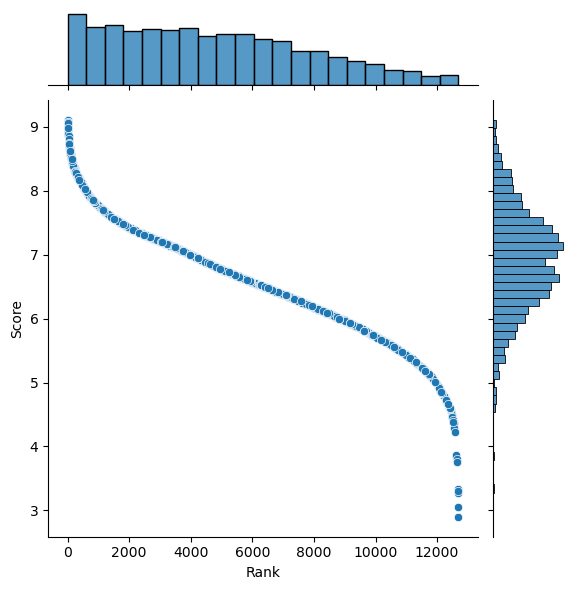

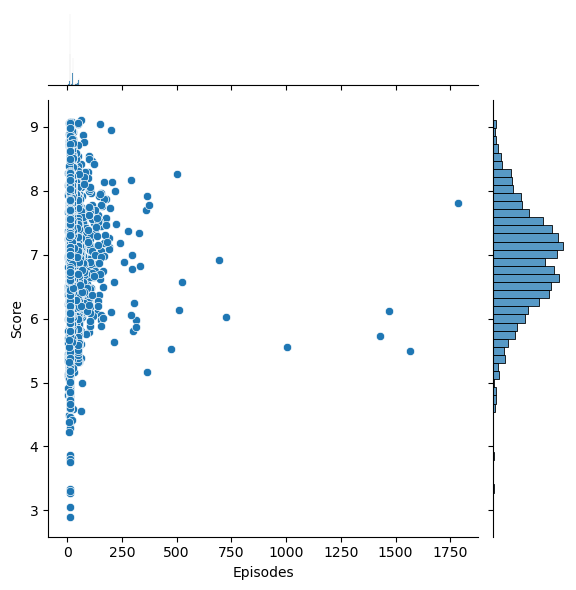

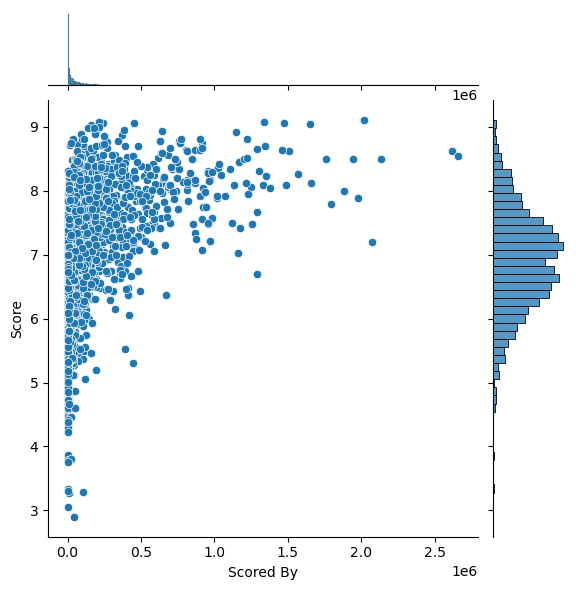

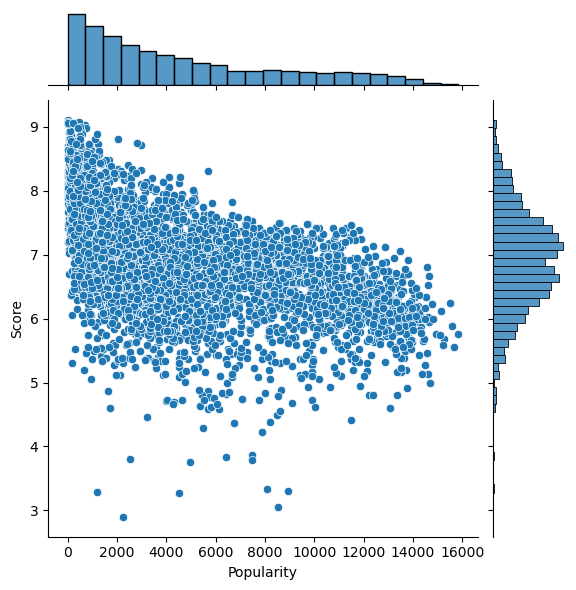

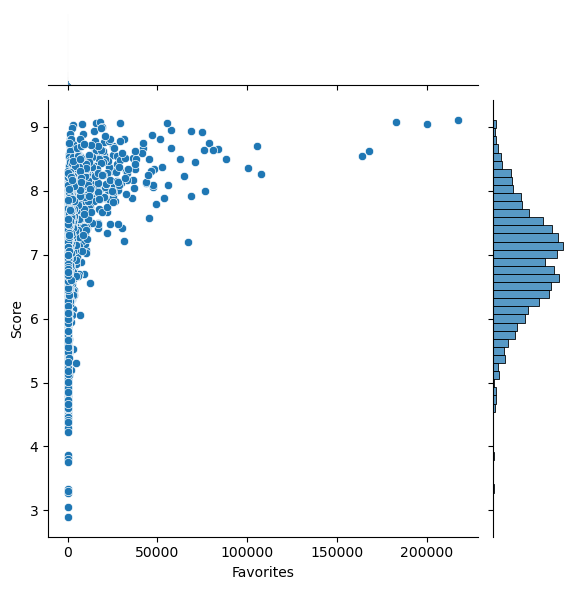

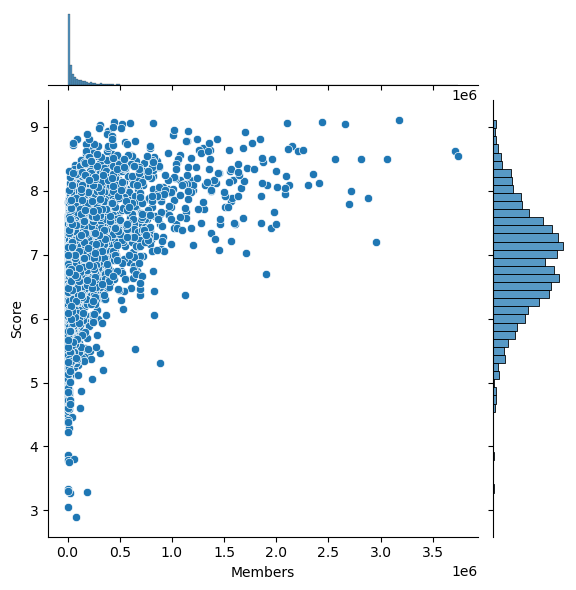

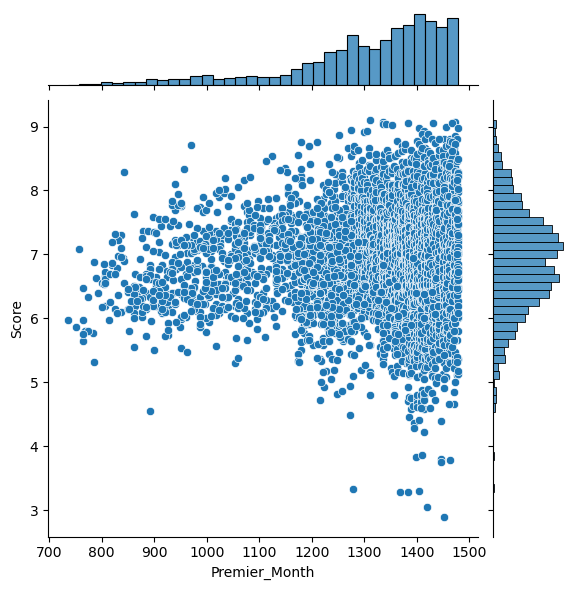

In [33]:
for y in int_cols:
    sb.jointplot(x=df[y],y=df['Score'])

### Linear Regression 

In [34]:
def prediction_plot(x:str, train_set:pd.DataFrame, test_set:pd.DataFrame, results:dict):
    """just a helper function to plot predictions against actuals"""
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(train_set[[x]], results['train'], color = "blue")
    axes[0].plot(train_set[[x]], train_set[[x]], linewidth = 1, color = 'black')
    axes[0].set_xlabel(f"True values of {x}")
    axes[0].set_ylabel(f"Predicted values of {x}")
    axes[1].scatter(test_set[[x]], results['test'], color = "green")
    axes[1].plot(test_set[[x]], test_set[[x]], linewidth = 1, color='black')
    axes[1].set_xlabel(f"True values of {x}")
    axes[1].set_ylabel(f"Predicted values of {x}")
    plt.show()

def linear_regression(x:str, y:str, train_set:pd.DataFrame, test_set:pd.DataFrame):
    """does linear regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    linreg = LinearRegression()
    # check if list
    if type(y) is list:
        linreg.fit(train_set[y],train_set[[x]])
    else:
        linreg.fit(train_set[[y]],train_set[[x]])

    # print the intercept & coef in the form y = m*x + c
    print(f"""Line Equation
        {x} = {linreg.coef_}*{y} + {linreg.intercept_}
        """)

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = linreg.predict(datay)
        
        r2 = linreg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}""")
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

### Performing Linear Regression

For Premier Month: Months passed since 1900 

=============== Rank ===============
Line Equation
        Score = [[-0.00024731]]*Rank + [8.05935906]
        
train dataset
        R^2: 0.9571543105312059
        MSE: 0.027442920312189558
test dataset
        R^2: 0.9489447620256444
        MSE: 0.03309695558371083


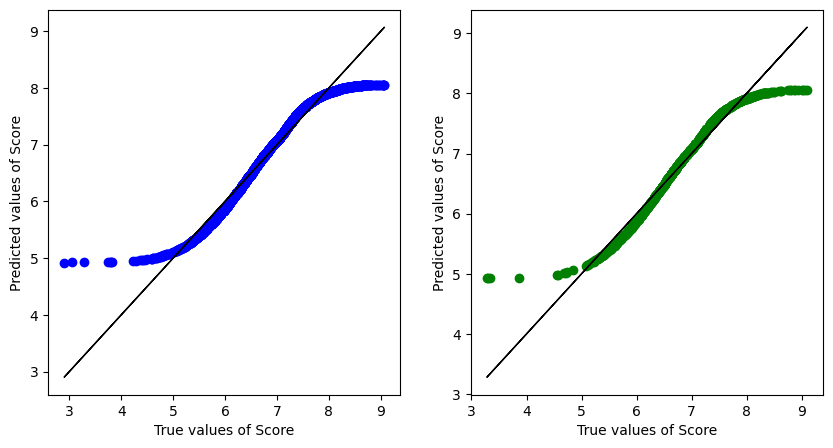

=============== Episodes ===============
Line Equation
        Score = [[0.00024437]]*Episodes + [6.88425604]
        
train dataset
        R^2: 0.0003020891228953104
        MSE: 0.6403124898817253
test dataset
        R^2: -0.003894394378598731
        MSE: 0.650782358475612


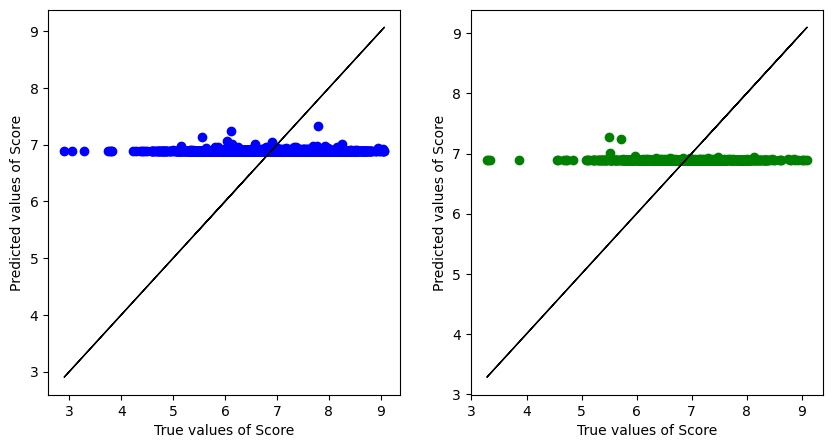

=============== Scored By ===============
Line Equation
        Score = [[1.66758077e-06]]*Scored By + [6.75191234]
        
train dataset
        R^2: 0.17531939136409325
        MSE: 0.528212861232786
test dataset
        R^2: 0.1540458856582162
        MSE: 0.5483963420617244


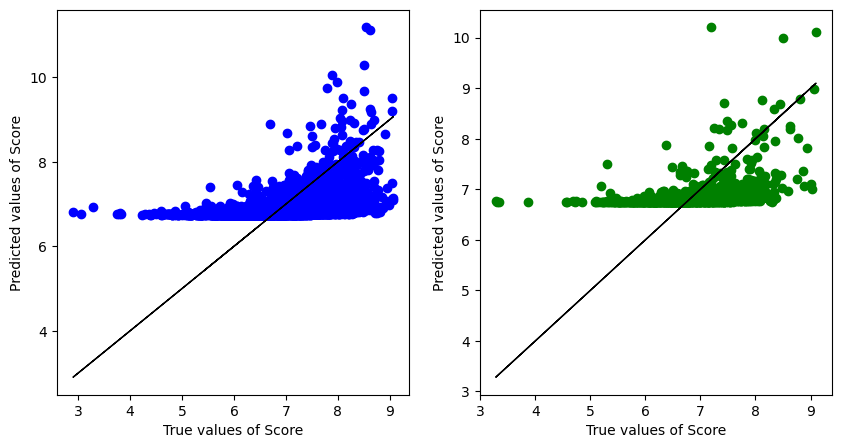

=============== Popularity ===============
Line Equation
        Score = [[-0.00010943]]*Popularity + [7.39351619]
        
train dataset
        R^2: 0.2882612162371959
        MSE: 0.45587294703527353
test dataset
        R^2: 0.30618619689011695
        MSE: 0.4497702005899449


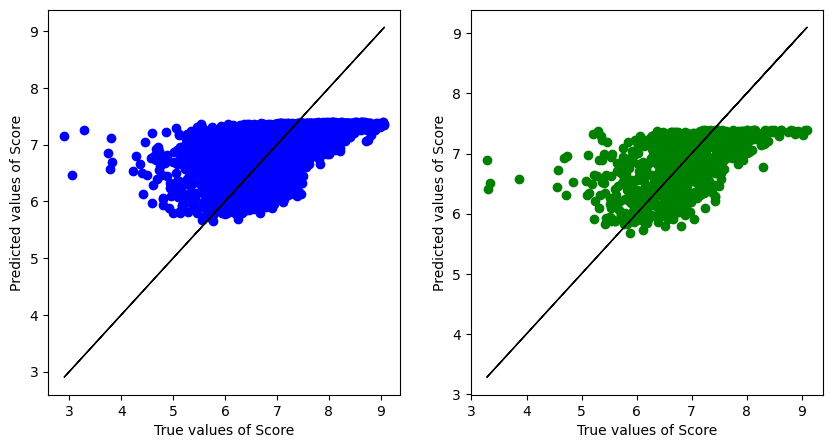

=============== Favorites ===============
Line Equation
        Score = [[3.243059e-05]]*Favorites + [6.82395646]
        
train dataset
        R^2: 0.12715600219965906
        MSE: 0.5590617999986613
test dataset
        R^2: 0.08127640493409183
        MSE: 0.595569724596652


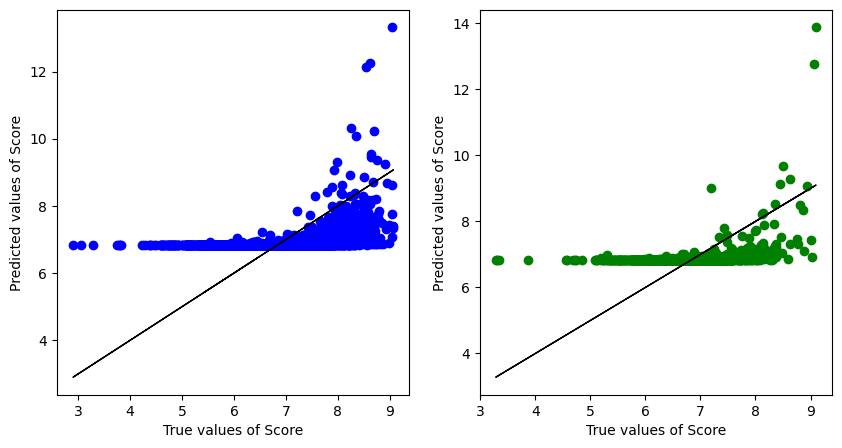

=============== Members ===============
Line Equation
        Score = [[1.12211973e-06]]*Members + [6.70963792]
        
train dataset
        R^2: 0.21180718908494034
        MSE: 0.5048422086038954
test dataset
        R^2: 0.19038599874488382
        MSE: 0.5248385807730473


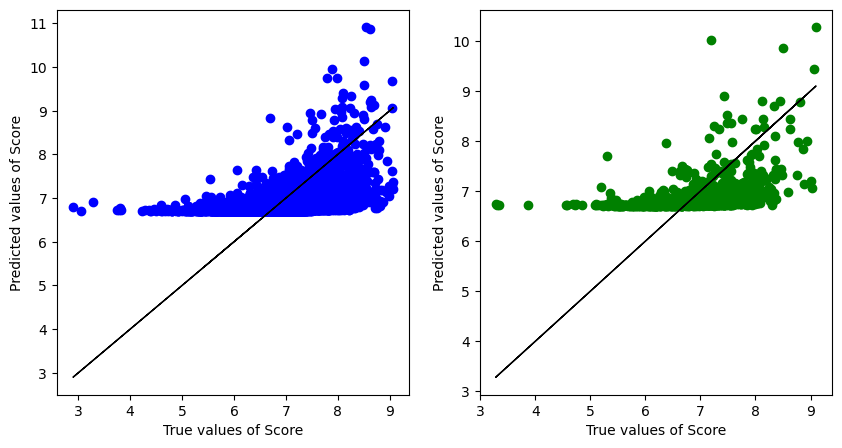

=============== Premier_Month ===============
Line Equation
        Score = [[0.00024808]]*Premier_Month + [6.56775517]
        
train dataset
        R^2: 0.0021228631220807648
        MSE: 0.6391462732474349
test dataset
        R^2: 0.0068803682943653355
        MSE: 0.6437975346698501


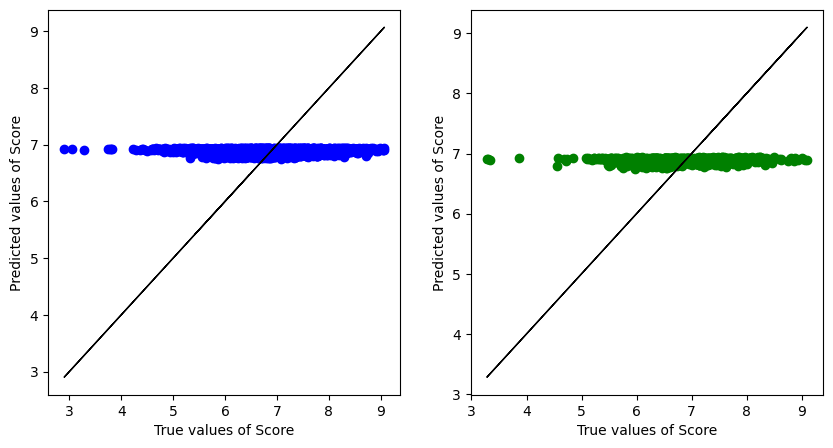

Rank regression
0 dataset
        R^2: 0.9571543105312059
        MSE: 0.027442920312189558
1 dataset
        R^2: 0.9489447620256444
        MSE: 0.03309695558371083
Episodes regression
0 dataset
        R^2: 0.0003020891228953104
        MSE: 0.6403124898817253
1 dataset
        R^2: -0.003894394378598731
        MSE: 0.650782358475612
Scored By regression
0 dataset
        R^2: 0.17531939136409325
        MSE: 0.528212861232786
1 dataset
        R^2: 0.1540458856582162
        MSE: 0.5483963420617244
Popularity regression
0 dataset
        R^2: 0.2882612162371959
        MSE: 0.45587294703527353
1 dataset
        R^2: 0.30618619689011695
        MSE: 0.4497702005899449
Favorites regression
0 dataset
        R^2: 0.12715600219965906
        MSE: 0.5590617999986613
1 dataset
        R^2: 0.08127640493409183
        MSE: 0.595569724596652
Members regression
0 dataset
        R^2: 0.21180718908494034
        MSE: 0.5048422086038954
1 dataset
        R^2: 0.19038599874488382
        MSE:

In [35]:
regs = dict([(y , {}) for y in int_cols])
for y in int_cols:
    regs[y]['r2'], regs[y]['mse'] = linear_regression('Score',y,train_set=train_set, test_set=test_set)

for name, res in regs.items():
    print(f"{name} regression")
    for i in range(len(res['r2'])):
        print(f"""{i} dataset
        R^2: {res['r2'][i]}
        MSE: {res['mse'][i]}""")


# Performing Predictions
We use popularity, and the encoded genres and studios. Using rank is cheating as it is based on score.

In [36]:
y = genres.copy()
y = y + studios
y.append('Popularity')

### Ordinary Least Squares
The most simple & basic form of regression. It has the best results of the tested models.

=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio', 'Popul

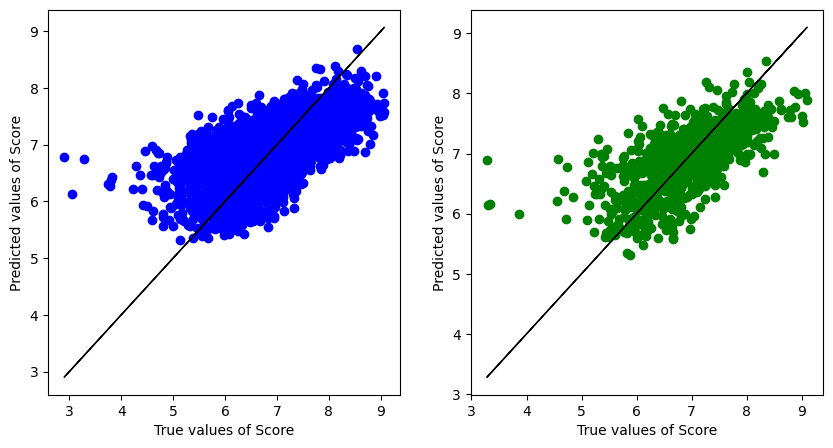

([0.4394514764070615, 0.4279920360485828],
 [0.3590346813132865, 0.3708086168541235])

In [37]:
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

### K Nearest Neighbours
This doesn't seem to work very well, we need a high value of k (around 30) to get a decent R^2, suggesting too much generalisation

In [38]:
def knn(x:str, y:str, train_set:object, test_set:object, k:int):
    """does K nearest Neighbour regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @param k: The number of neighbours
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    neighreg = KNeighborsRegressor(n_neighbors=k)
    # check if list
    if type(y) is list:
        neighreg.fit(train_set[y],train_set[[x]])
    else:
        neighreg.fit(train_set[[y]],train_set[[x]])


    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = neighreg.predict(datay)
        
        r2 = neighreg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}""")
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

=== k = 5 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit S

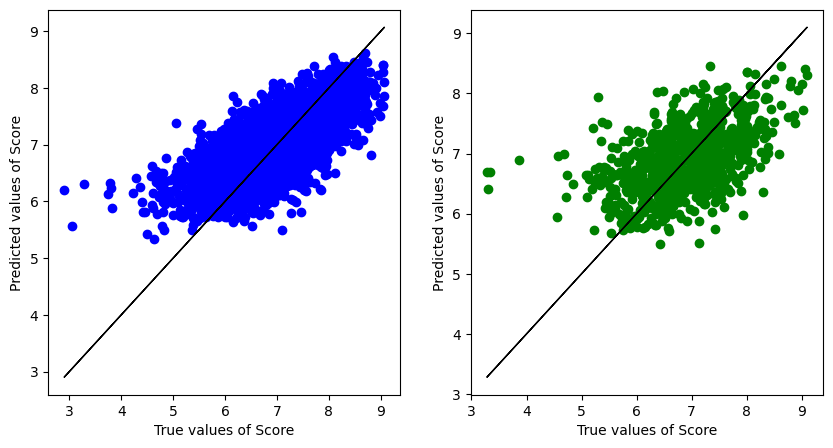

=== k = 10 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

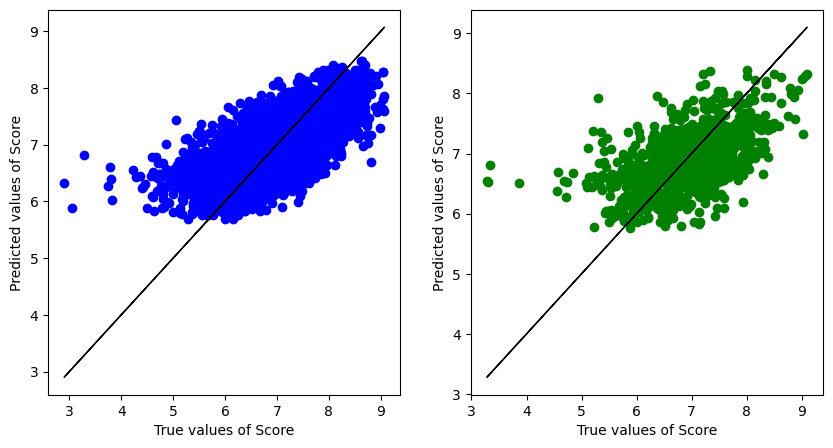

=== k = 15 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

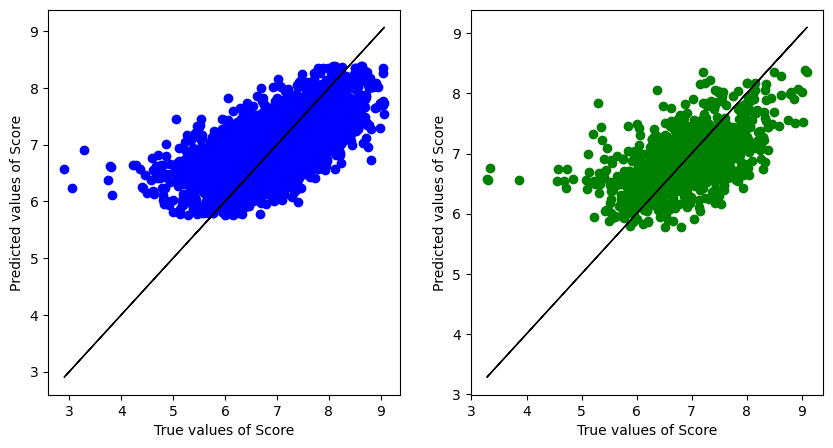

=== k = 20 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

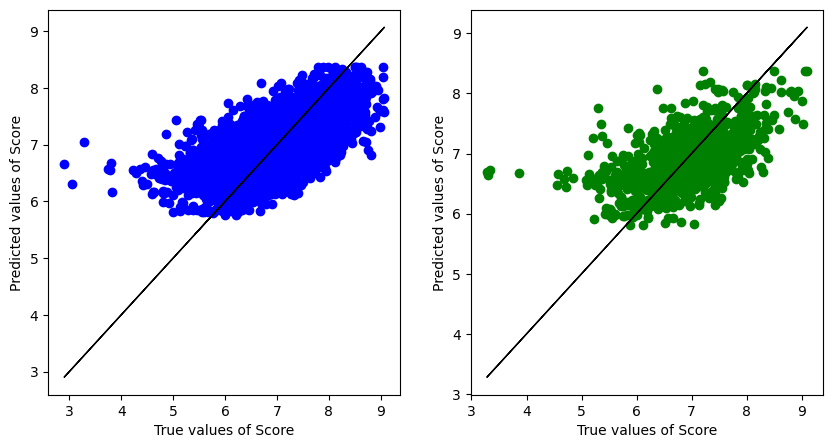

=== k = 25 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

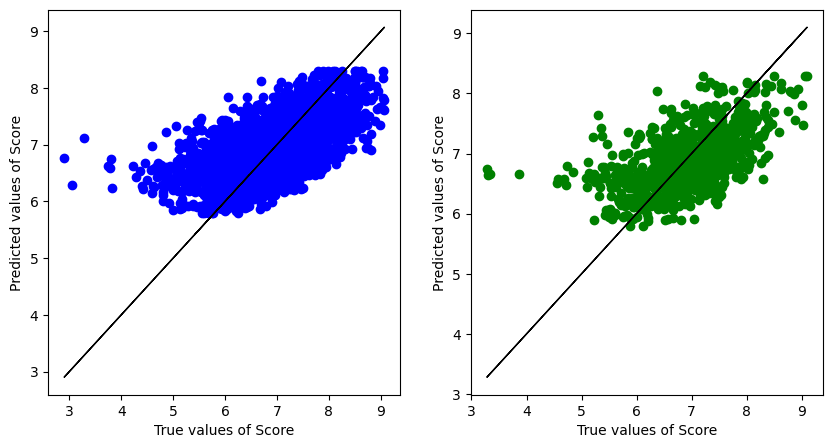

=== k = 30 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

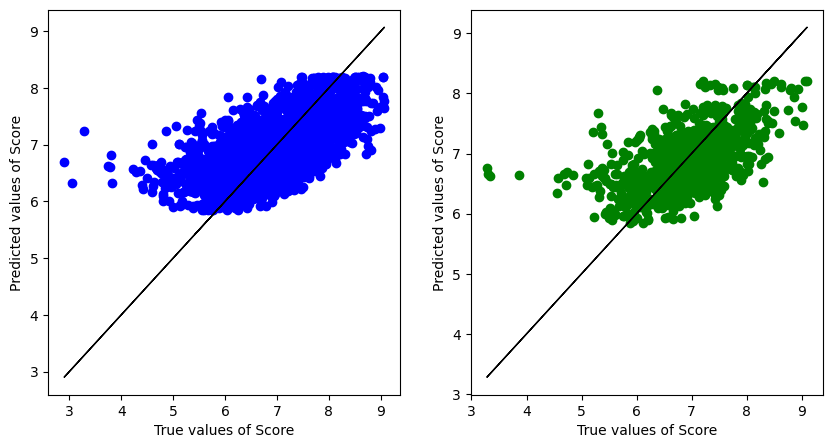

In [39]:
for i in range(5,35,5):
    print(f'=== k = {i} ===')
    knn(x='Score',y=y,train_set=train_set, test_set=test_set, k=i)

### Decision Tree
This seems to perform worse than Ordinary Least Squares, despite testing multiple depths.

In [40]:
def tree(x:str, y:str, train_set:object, test_set:object, max_depth:int=None):
    """does decision tree regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @param max_depth: maximum depth of tree
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    treereg = DecisionTreeRegressor(max_depth=max_depth)
    # check if list
    if type(y) is list:
        treereg.fit(train_set[y],train_set[[x]])
    else:
        treereg.fit(train_set[[y]],train_set[[x]])

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = treereg.predict(datay)
        
        r2 = treereg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}""")
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

=== DEPTH = 3 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

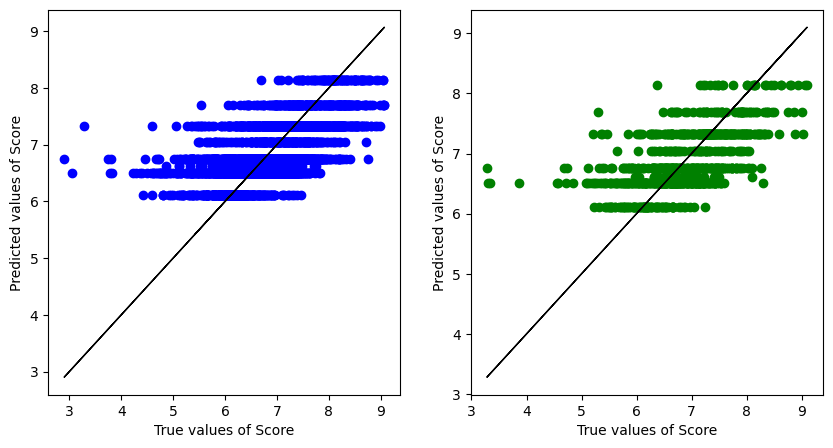

=== DEPTH = 4 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

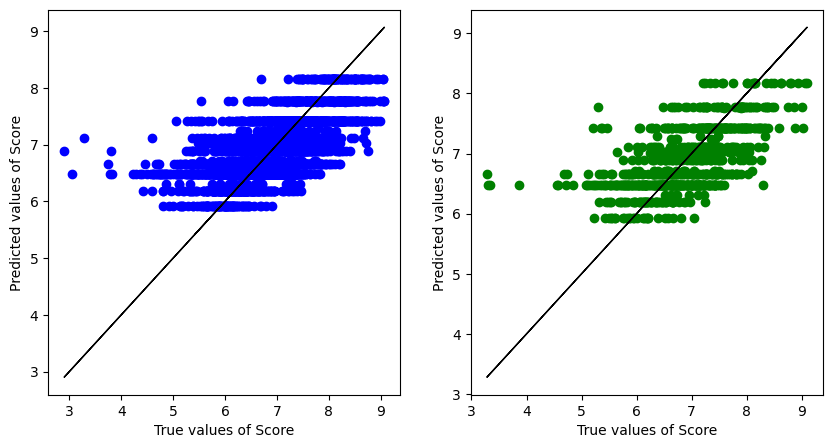

=== DEPTH = 5 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

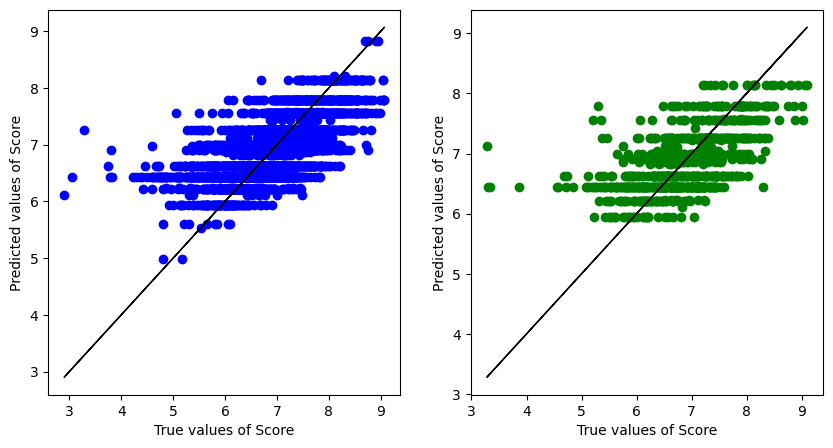

=== DEPTH = 6 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

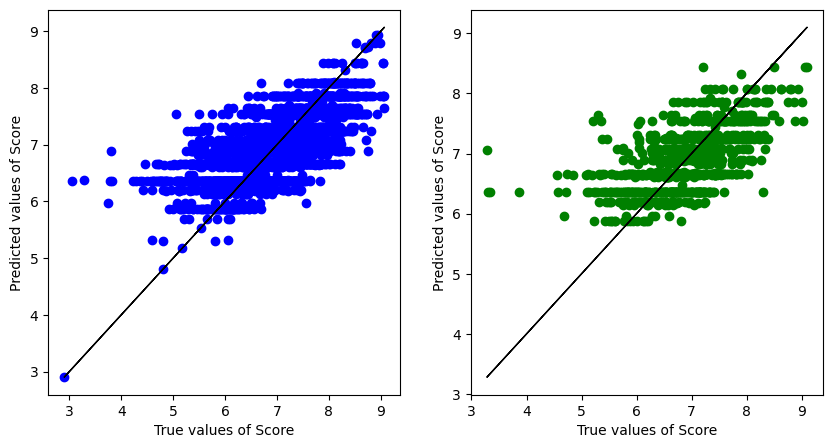

=== DEPTH = 7 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

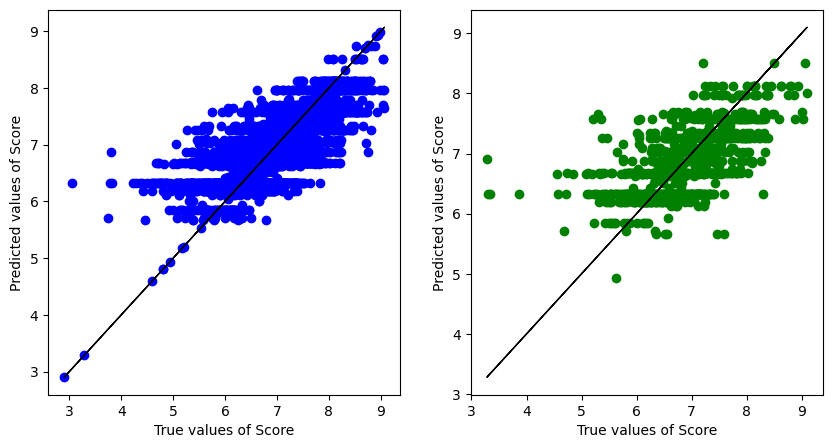

=== DEPTH = 8 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

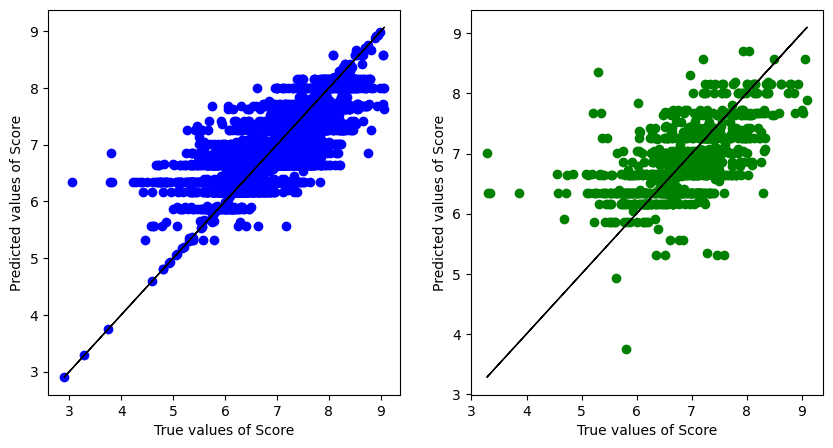

=== DEPTH = 9 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'W

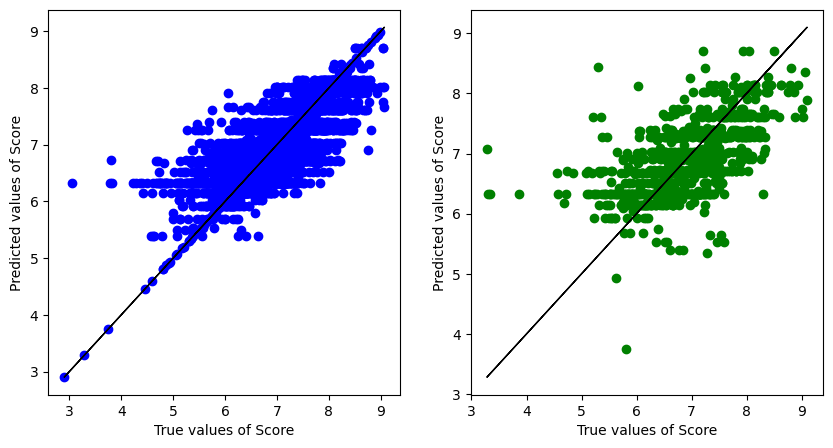

In [41]:
for i in range (3,10):
    print(f'=== DEPTH = {i} ===')
    tree(x='Score',y=y,train_set=train_set, test_set=test_set, max_depth=i)